In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [2]:
#PARAMETERS:

#Masses:
m1=5 ; m2=1 ; m3=2 ; m4=4 ; m5=6

#Spring constants:
c1=1 ; c2=5 ; c3=3 ; c4=4 ; c5=3

#----------------------------------------------------------------------------------------

#INITIAL CONDITIONS:

#Initial Conditions 1:
u11=0. ; u21=0. ; u31=0. ; u41=0. ; u51=1.
du11=0. ; du21=0. ; du31=0. ; du41=0. ; du51=0.

ic1m=[u11,u21,u31,u41,u51,du11,du21,du31,du41,du51]

#Initial Conditions 2:
u12=0. ; u22=0. ; u32=0. ; u42=0. ; u52=0.
du12=0. ; du22=1. ; du32=0. ; du42=0. ; du52=0.

ic2m=[u12,u22,u32,u42,u52,du12,du22,du32,du42,du52]

#Initial Conditions 3:
u13=0. ; u23=0. ; u33=0. ; u43=0. ; u53=1.
du13=0. ; du23=1. ; du33=0. ; du43=0. ; du53=0.
      
ic3m=[u13,u23,u33,u43,u53,du13,du23,du33,du43,du53]

In [3]:
def setAnchor(sol,steps):
    #anchor points below y=0
    anch = [2,4,6,8,10]
    #list to store modified solutions
    y_list = []
    
    #change solution anchorpoints
    for i in range(0,10):
        if(i<5):
            for j in range(0,steps):
                sol[i,j] = sol[i,j]-anch[i]
        y_list.append(sol[i])
    return y_list

In [4]:
def spring(a,b,pos):
    A = 1/50
    waves = 5
    dy = b-a
    Y = np.linspace(0,dy,100)
    X = A*np.sin(waves/dy*2*np.pi*Y)+pos
    
    return [X,Y+a]

In [5]:
#Plot Displacement and Velocity vs. Time
def graph33(T,Y,tNum):
    titleList331 = ["Displacements of Undamped and Forced System (Ini. Cond. 1)","Velocities of Undamped and Forced System (Ini. Cond. 1)"]
    titleList332 = ["Displacements of Undamped and Forced System (Ini. Cond. 2)","Velocities of Undamped and Forced System (Ini. Cond. 2)"]
    titleList333 = ["Displacements of Undamped and Forced System (Ini. Cond. 3)","Velocities of Undamped and Forced System (Ini. Cond. 3)"]
    titles33 = [titleList331,titleList332,titleList333]
    
    #Displacement vs. Time
    for i in range(0,5):
        plt.rcParams['font.family'] = 'serif'
        plt.plot(T, Y[i], label = "u"+'{:01d}'.format(i+1))
        
    plt.title(titles33[tNum][0])
    plt.xlabel("Time", size=11.5)
    plt.ylabel("Displacement", size=11.5)
    plt.grid()
    plt.legend(loc=1)
    plt.savefig('Graphs/Graphs4/D{:01d}.pdf'.format(tNum+1))
    plt.show()

    #Velocity vs. Time
    for i in range(5,10):
        plt.plot(T, Y[i], label = "v"+'{:01d}'.format(i-4))
        plt.rcParams['font.family'] = 'serif'
    plt.title(titles33[tNum][1])
    plt.xlabel("Time", size=11.5)
    plt.ylabel("Velocity", size=11.5)
    plt.grid()
    plt.legend(loc=1)
    plt.savefig('Graphs/Graphs4/V{:01d}.pdf'.format(tNum+1))
    plt.show()

In [6]:
#3.3 DAMPED & FORCED
#The Parameter Matrix P
m33 = [[0,0,0,0,0,1,0,0,0,0],
       [0,0,0,0,0,0,1,0,0,0],
       [0,0,0,0,0,0,0,1,0,0],
       [0,0,0,0,0,0,0,0,1,0],
       [0,0,0,0,0,0,0,0,0,1],
       [(-c1-c2)/m1,(c2)/m1,0,0,0,0,0,0,0,0],
       [(c2)/m2,(-c2-c3)/m2,(c3)/m2,0,0,0,0,0,0,0],
       [0,(c3)/m3,(-c3-c4)/m3,(c4)/m3,0,0,0,0,0,0],
       [0,0,(c4)/m4,(-c4-c5)/m4,(c5)/m4,0,0,0,0,0],
       [0,0,0,(c5)/m5,(-c5)/m5,0,0,0,0,0]]

In [7]:
#3.3 Set up Linspace and Time Interval
steps = 3000
t = np.linspace(0.0, 180.0, steps)
ts = (0,180)

In [8]:
#3.3 System of Differential Equations
def DE33(t,y):
    #driving force vector g(t)
    g = [0,0,0,0,0,0/m1,0/m2,0/m3,0/m4,(2.0*np.sin(t))/m5]
    return np.matmul(m33,y) + g

In [9]:
#Numerical Solutions for Initial Conditions 1,2 and 3
sol45y331 = solve_ivp(DE33, ts, ic1m, t_eval=t, method='RK45')
sol45y332 = solve_ivp(DE33, ts, ic2m, t_eval=t, method='RK45')
sol45y333 = solve_ivp(DE33, ts, ic3m, t_eval=t, method='RK45')

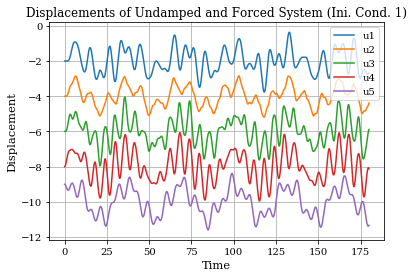

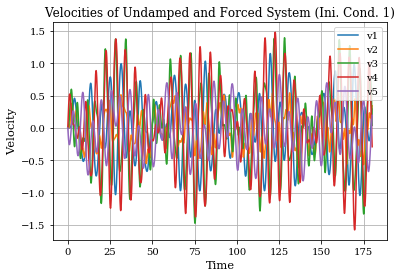

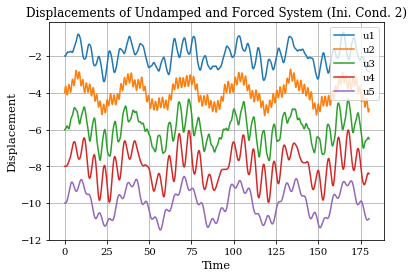

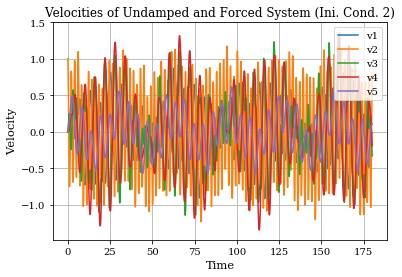

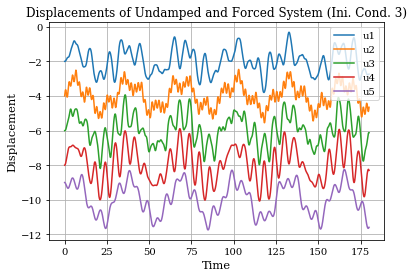

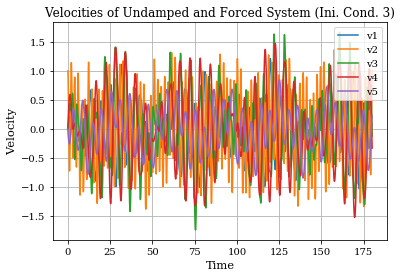

In [10]:
#3.3 Damped and Forced System Graphs
sol331 = setAnchor(sol45y331.y,3000)
sol332 = setAnchor(sol45y332.y,3000)
sol333 = setAnchor(sol45y333.y,3000)

#Graphs
graph33(t,sol331,0) #INITIAL CONDITION 1
graph33(t,sol332,1) #INITIAL CONDITION 2
graph33(t,sol333,2) #INITIAL CONDITION 3

<IPython.core.display.Javascript object>


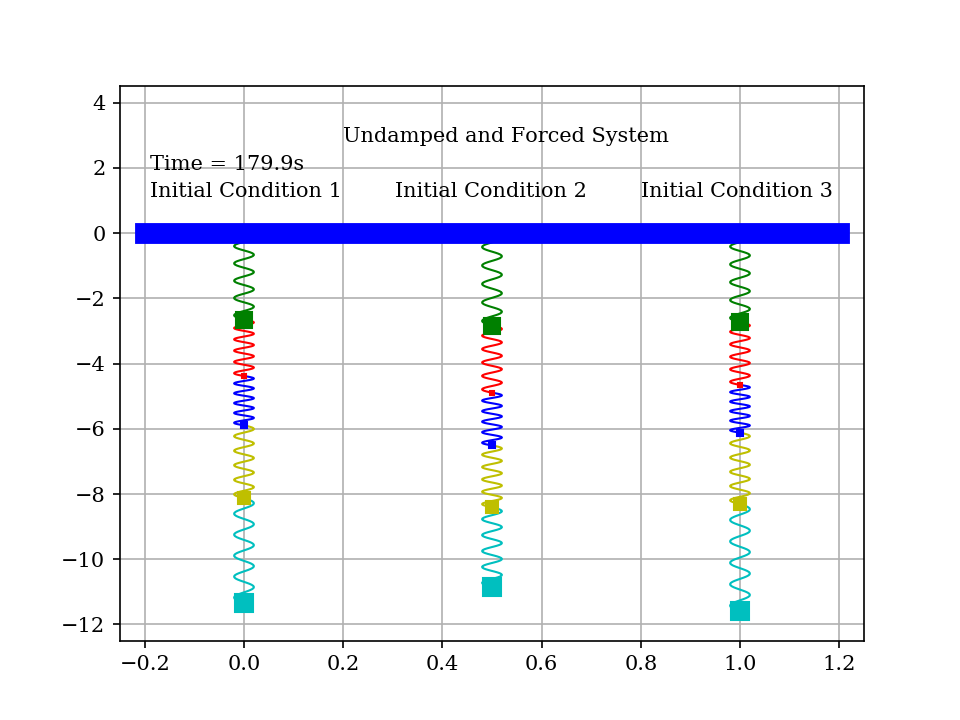

In [11]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.25, 1.25), ylim=(-12.5, 4.5))
ax.grid()

dt = 60/1000

#Plot Elements
#INITIAL CONDITION 1
spring1, = ax.plot([], [],'g-', lw=1)
spring2, = ax.plot([], [],'r-', lw=1)
spring3, = ax.plot([], [],'b-', lw=1)
spring4, = ax.plot([], [],'y-', lw=1)
spring5, = ax.plot([], [],'c-', lw=1)
mass1, = ax.plot([], [],'gs', markersize = 1.5*m1)
mass2, = ax.plot([], [],'rs', markersize = 1.5*m2)
mass3, = ax.plot([], [],'bs', markersize = 1.5*m3)
mass4, = ax.plot([], [],'ys', markersize = 1.5*m4)
mass5, = ax.plot([], [],'cs', markersize = 1.5*m5)

#INITIAL CONDITION 2
spring6, = ax.plot([], [],'g-', lw=1)
spring7, = ax.plot([], [],'r-', lw=1)
spring8, = ax.plot([], [],'b-', lw=1)
spring9, = ax.plot([], [],'y-', lw=1)
spring10, = ax.plot([], [],'c-', lw=1)
mass6, = ax.plot([], [],'gs', markersize = 1.5*m1)
mass7, = ax.plot([], [],'rs', markersize = 1.5*m2)
mass8, = ax.plot([], [],'bs', markersize = 1.5*m3)
mass9, = ax.plot([], [],'ys', markersize = 1.5*m4)
mass10, = ax.plot([], [],'cs', markersize = 1.5*m5)

#INITIAL CONDITION 3
spring11, = ax.plot([], [],'g-', lw=1)
spring12, = ax.plot([], [],'r-', lw=1)
spring13, = ax.plot([], [],'b-', lw=1)
spring14, = ax.plot([], [],'y-', lw=1)
spring15, = ax.plot([], [],'c-', lw=1)
mass11, = ax.plot([], [],'gs', markersize = 1.5*m1)
mass12, = ax.plot([], [],'rs', markersize = 1.5*m2)
mass13, = ax.plot([], [],'bs', markersize = 1.5*m3)
mass14, = ax.plot([], [],'ys', markersize = 1.5*m4)
mass15, = ax.plot([], [],'cs', markersize = 1.5*m5)

bar, = ax.plot([], [], 'b-', lw=10)

#TEXT
time_template = 'Time = '
time_text = ax.text(0.04, 0.85, '', transform=ax.transAxes)

init1 = ax.text(0.04, 0.8, '', transform=ax.transAxes)
init2 = ax.text(0.37, 0.8, '', transform=ax.transAxes)
init3 = ax.text(0.7, 0.8, '', transform=ax.transAxes)

title = ax.text(0.3, 0.9, '', transform=ax.transAxes)

def init():
    spring1.set_data([], [])
    spring2.set_data([], [])
    spring3.set_data([], [])
    spring4.set_data([], [])
    spring5.set_data([], [])
    spring6.set_data([], [])
    spring7.set_data([], [])
    spring8.set_data([], [])
    spring9.set_data([], [])
    spring10.set_data([], [])
    spring11.set_data([], [])
    spring12.set_data([], [])
    spring13.set_data([], [])
    spring14.set_data([], [])
    spring15.set_data([], [])
    mass1.set_data([], [])
    mass2.set_data([], [])
    mass3.set_data([], [])
    mass4.set_data([], [])
    mass5.set_data([], [])
    mass6.set_data([], [])
    mass7.set_data([], [])
    mass8.set_data([], [])
    mass9.set_data([], [])
    mass10.set_data([], [])
    mass11.set_data([], [])
    mass12.set_data([], [])
    mass13.set_data([], [])
    mass14.set_data([], [])
    mass15.set_data([], [])
    
    time_text.set_text('')
    init1.set_text('')
    init2.set_text('')
    init3.set_text('')
    title.set_text('')
    return spring1, spring2, spring3, spring4, spring5, spring6, spring7, spring8, spring9, spring10, spring11, spring12, spring13, spring14, spring15, mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, mass9, mass10, mass11, mass12,mass13,mass14,mass15, time_text, init1, init2, init3, title

def animate(i):
    
    bar.set_data([-0.2,1.2],[0])
    
    #Initial Condition 1 pos=0
    xpos1 = 0.0
    
    x1,y1 = spring(0,sol331[0][i],xpos1)
    spring1.set_data(x1,y1)
    
    x2,y2 = spring(sol331[0][i],sol331[1][i],xpos1)
    spring2.set_data(x2,y2)
    
    x3,y3 = spring(sol331[1][i],sol331[2][i],xpos1)
    spring3.set_data(x3,y3)
    
    x4,y4 = spring(sol331[2][i],sol331[3][i],xpos1)
    spring4.set_data(x4,y4)
    
    x5,y5 = spring(sol331[3][i],sol331[4][i],xpos1)
    spring5.set_data(x5,y5)
    
    mass1.set_data(xpos1,sol331[0][i])
    mass2.set_data(xpos1,sol331[1][i])
    mass3.set_data(xpos1,sol331[2][i])
    mass4.set_data(xpos1,sol331[3][i])
    mass5.set_data(xpos1,sol331[4][i])
    
    #Initial Condition 2 pos=0.5
    xpos2 = 0.5
    
    x6,y6 = spring(0,sol332[0][i],xpos2)
    spring6.set_data(x6,y6)
    
    x7,y7 = spring(sol332[0][i],sol332[1][i],xpos2)
    spring7.set_data(x7,y7)
    
    x8,y8 = spring(sol332[1][i],sol332[2][i],xpos2)
    spring8.set_data(x8,y8)
    
    x9,y9 = spring(sol332[2][i],sol332[3][i],xpos2)
    spring9.set_data(x9,y9)
    
    x10,y10 = spring(sol332[3][i],sol332[4][i],xpos2)
    spring10.set_data(x10,y10)
    
    mass6.set_data(xpos2,sol332[0][i])
    mass7.set_data(xpos2,sol332[1][i])
    mass8.set_data(xpos2,sol332[2][i])
    mass9.set_data(xpos2,sol332[3][i])
    mass10.set_data(xpos2,sol332[4][i])
    
    #Initial Condition 3 pos=1.0
    xpos3 = 1.0
    
    x11,y11 = spring(0,sol333[0][i],xpos3)
    spring11.set_data(x11,y11)
    
    x12,y12 = spring(sol333[0][i],sol333[1][i],xpos3)
    spring12.set_data(x12,y12)
    
    x13,y13 = spring(sol333[1][i],sol333[2][i],xpos3)
    spring13.set_data(x13,y13)
    
    x14,y14 = spring(sol333[2][i],sol333[3][i],xpos3)
    spring14.set_data(x14,y14)
    
    x15,y15 = spring(sol333[3][i],sol333[4][i],xpos3)
    spring15.set_data(x15,y15)
   
    mass11.set_data(xpos3,sol333[0][i])
    mass12.set_data(xpos3,sol333[1][i])
    mass13.set_data(xpos3,sol333[2][i])
    mass14.set_data(xpos3,sol333[3][i])
    mass15.set_data(xpos3,sol333[4][i])
    
    time_text.set_text(time_template + '{:4.1f}'.format(i*dt) + 's')
    init1.set_text("Initial Condition 1")
    init2.set_text("Initial Condition 2")
    init3.set_text("Initial Condition 3")
    title.set_text("Undamped and Forced System")
    return spring1, spring2, spring3, spring4, spring5, spring6, spring7, spring8, spring9, spring10, spring11, spring12, spring13, spring14, spring15,mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, mass9, mass10, mass11, mass12, mass13, mass14, mass15, time_text, init1, init2, init3, title

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                             interval=20, blit=True, init_func=init)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Me'), bitrate=1800)
ani.save('Animations/Animation4/animation4.mp4', writer=writer, dpi=400)